<h3>Doing real-data regression using sklearn tools</h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'D:\Applied ML learning\Linear_regression\train.csv')

X_train, X_test, y_train, y_test = train_test_split(df, df['SalePrice'], test_size=0.3, random_state=0)

In [ ]:
X_train = (
    X_train
    .reset_index().drop('index',axis=1)
    .select_dtypes(exclude=['object'])
    .drop('Id',axis=1)
    .drop('SalePrice',axis=1)
)

In [ ]:
X_train = (
    X_train
    .reset_index().drop('index',axis=1)
    .select_dtypes(exclude=['object'])
    .drop('Id',axis=1)
    .drop('SalePrice',axis=1)
)

In [ ]:
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)

In [ ]:
X_test = (
    X_test
    .reset_index().drop('index',axis=1)
    .select_dtypes(exclude=['object'])
    .drop('Id',axis=1)
    .drop('SalePrice',axis=1)
)

In [ ]:
imputer = SimpleImputer(strategy='median')
X_test  = imputer.fit_transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
reg.score(X_test, y_test)

<H3>Developing of my own linear regression algorithm</H3>

In [112]:
class MultivariateRegression:
    def __init__(self):
        self.residuals, self.slope, self.intercept, self.error = ([] for _ in range(4))
        self.score = 0        
        
    def fit(self, X_all, y):          
        def fit_array(X, k, y):
            x_mean = np.mean(X)
            y_mean = np.mean(y)

            self.residuals.append(sum([yi - y_mean for yi in y]))

            xy   = sum([xi*yi for (xi,yi) in zip(X,y)])
            SSxy = (xy - sum(X)*sum(y)) / len(X)
            SSxx = (sum(X)**2) - ((sum(X)**2)/2)

            self.slope.append(SSxy/SSxx)
            self.intercept.append(y_mean - self.slope[k]*x_mean)
                        
            self.error.append([(yi - (self.slope[k]*xi + self.intercept[k]))**2 for (xi,yi) in zip(X,y)])                       
                    
        for column, i in zip(X_all.T, range(X_all.shape[1])):        
            fit_array(column, i, y)     
               
        self.score = 1 - (np.mean(self.error) / (np.prod(self.residuals)**2))
        self.error = np.mean(self.error[0])

    def predict(self, *X):
        X = X[0]    
        _slope = sum(self.slope) / len(self.slope)
        _intercept = sum(self.intercept)/ len(self.intercept)
        
        if type(X) == (pd.Series or list ):
            return [(_slope*xi + _intercept) for xi in X]
                
        return (_slope*X + _intercept)  

    '''def gradient_descent(x_actual, x_pred, intercept, slope, L=0.01):
        old_intercept = -2(x_actual + (x_pred*slope + intercept))
        step_size = old_intercept*L
        new_intercept = old_intercept-step_size

        step_size_limit = 0.001
        step_num_limit  = 1000
        if step_size >= step_size_limit & 0 >= step_num_limit:
            pass
       
        return 0'''

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'D:\Applied ML learning\Linear_regression\Data.csv')
df = df.drop([360,811],axis=0)

#X_train, X_test, y_train, y_test = train_test_split(df[['Rainfall','Hospital_dist']], df.Price_house, train_size=0.7, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(df['Rainfall'].values.reshape(-1,1), df.Price_house, train_size=0.7, random_state=0)

In [118]:
X_train = SimpleImputer(strategy='median').fit_transform(X_train)
X_test  = SimpleImputer(strategy='median').fit_transform(X_test)

In [145]:
myreg = MultivariateRegression()
myreg.fit(X_train, y_train)
y_pred = myreg.predict(X_test)
myreg.score

-5.143760529400945e+24

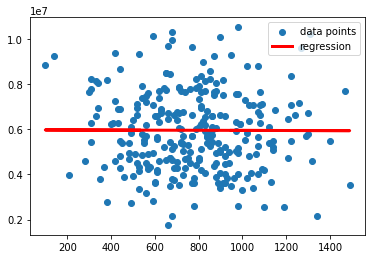

In [186]:
'''fig, ax = plt.subplots()
ax.legend(['regression line', 'data'], )
ax.scatter
ax.plot'''

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r',linewidth=3.0)
plt.legend(['data points','regression'], loc='upper right')